Saving 1. Predict Loan Default.csv to 1. Predict Loan Default (1).csv
Data Loaded Successfully ✅
Preprocessing Complete 🔧
Training samples: 204277, Testing samples: 51070
Model Trained Successfully 🧠
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.67      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



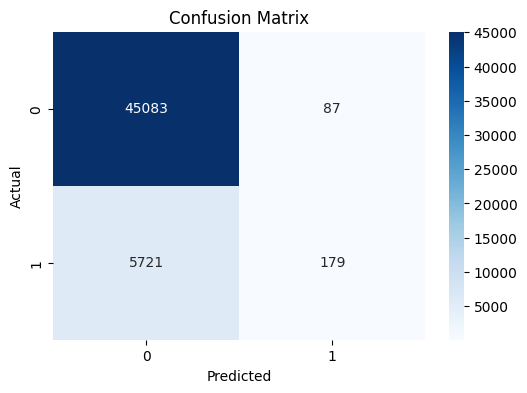

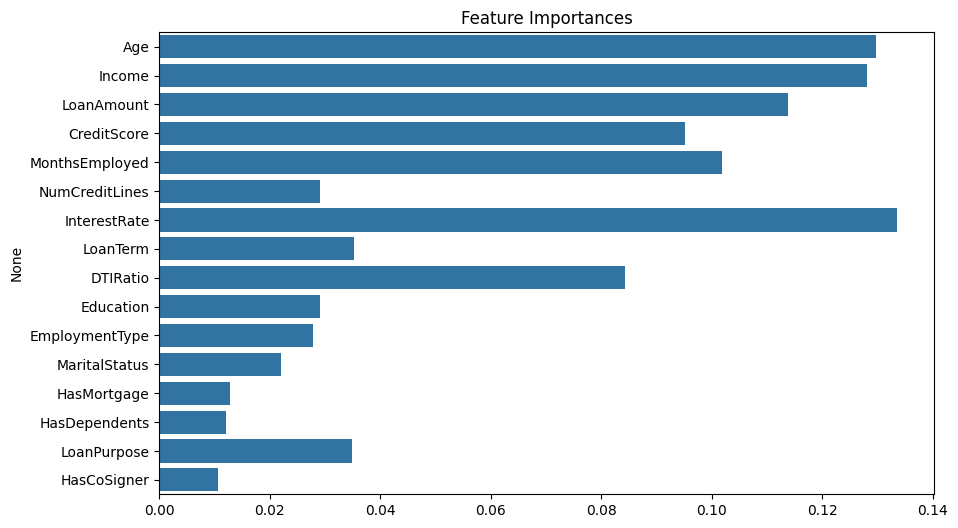

In [2]:
# Predict Loan Default - Mid Sem Exam Project

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 2: Upload and Load Dataset
uploaded = files.upload()
df = pd.read_csv("1. Predict Loan Default.csv")
print("Data Loaded Successfully ✅")
df.head()

# Step 3: Data Preprocessing
df.drop(columns=['LoanID'], inplace=True)

# Encode categorical features only if not already numeric
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('Default', axis=1)
y = df['Default']
print("Preprocessing Complete 🔧")

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Step 5: Model Training
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
print("Model Trained Successfully 🧠")

# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# <-- Line gap added here -->

print("\n")  # Line gap for visual separation

# Step 7: Feature Importance
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()
